# Clean each dataset

In [1]:
import pandas as pd
%cd  /Users/MarianaMaroto/Desktop/MS in Data Science/74020 Machine Learning/ML Project/
all_data =  pd.read_csv('2021VAERSDATA.csv', sep=",", encoding = "ISO-8859-1")
symptoms_data = pd.read_csv('2021VAERSSYMPTOMS.csv', sep=",", encoding = "ISO-8859-1")
vax_data = pd.read_csv('2021VAERSVAX.csv', sep=",", encoding = "ISO-8859-1")

print('Main Dataset Size:', all_data.shape)
print('Symptoms Dataset Size:', symptoms_data.shape)
print('Vaccine Info Dataset Size:', vax_data.shape)

[WinError 3] The system cannot find the path specified: '/Users/MarianaMaroto/Desktop/MS in Data Science/74020 Machine Learning/ML Project/'
C:\Users\andre\Documents\Ms DS - CUNY\Machine Learning\Project\VaccineReactions-main
Main Dataset Size: (40348, 35)
Symptoms Dataset Size: (56533, 11)
Vaccine Info Dataset Size: (40937, 8)


C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 1. all_data dataset

This dataset contains data like gender, age, and other useful features.

In [2]:
all_data.head()

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   
1    916601  01/01/2021    CA     73.0     73.0      NaN   F      NaN   
2    916602  01/01/2021    WA     23.0     23.0      NaN   F      NaN   
3    916603  01/01/2021    WA     58.0     58.0      NaN   F      NaN   
4    916604  01/01/2021    TX     47.0     47.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED  ...  \
0  Right side of epiglottis swelled up and hinder...  NaN  ...   
1  Approximately 30 min post vaccination administ...  NaN  ...   
2  About 15 minutes after receiving the vaccine, ...  NaN  ...   
3  extreme fatigue, dizziness,. could not lift my...  NaN  ...   
4  Injection site swelling, redness, warm to the ...  NaN  ...   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                   kidney infection   
4                                                 Na   

                                             HISTORY  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3  diverticulitis, mitral valve prolapse, osteoar...   
4                                                NaN   

                                           PRIOR_VAX SPLTTYPE  FORM_VERS  \
0                                                NaN      NaN          2   
1                                                NaN      NaN          2   
2                                                NaN      NaN          2   
3  got measles from measel shot, mums from mumps ...      NaN          2   
4                                                NaN      NaN          2   

  TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0  01/01/2021          NaN         Y         NaN   
1  01/01/2021          NaN         Y         NaN   
2  01/01/2021          NaN       NaN           Y   
3  01/01/2021          NaN       NaN         NaN   
4  01/01/2021          NaN       NaN         NaN   

                                           ALLERGIES  
0                                  Pcn and bee venom  
1                                            "Dairy"  
2                                          Shellfish  
3  Diclofenac, novacaine, lidocaine, pickles, tom...  
4                                                 Na  

[5 rows x 35 columns]

In [3]:
#Find duplicates
all_data.duplicated().any()

False

In [4]:
#Find duplicates of 'VAERS_ID'
all_data['VAERS_ID'].duplicated().any()

False

## 2. symptoms_data dataset

This dataset contains all the reactions/symptoms that patients presented after obtaining the COVID-19 vaccine.

In [5]:
symptoms_data.head()

VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia             23.1   
1    916601                  Anxiety             23.1   
2    916602         Chest discomfort             23.1   
3    916603                Dizziness             23.1   
4    916604  Injection site erythema             23.1   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis             23.1                      NaN   
1                 Dyspnoea             23.1                      NaN   
2                Dysphagia             23.1        Pain in extremity   
3                  Fatigue             23.1       Mobility decreased   
4  Injection site pruritus             23.1  Injection site swelling   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  \
0              NaN                    NaN              NaN      NaN   
1              NaN                    NaN              NaN      NaN   
2             23.1      Visual impairment             23.1      NaN   
3             23.1                    NaN              NaN      NaN   
4             23.1  Injection site warmth             23.1      NaN   

   SYMPTOMVERSION5  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [6]:
#Find duplicates
symptoms_data.duplicated().any()

False

In [7]:
#Find duplicates of 'VAERS_ID'
print(symptoms_data['VAERS_ID'].duplicated().any())
print(symptoms_data['VAERS_ID'].duplicated().sum())

# The duplicates here means that a single patient had more than 5 symptoms
# and they were listed in different rows with the same VAERS_ID per patient.

True
16185


In [8]:
# Drop columns whose name contains a specific string from pandas DataFrame.
# Remove SYMPTOMVERSION columns
symptoms_data = symptoms_data[symptoms_data.columns.drop(list(symptoms_data.filter(regex='SYMPTOMVERSION')))]
symptoms_data.head()

VAERS_ID                 SYMPTOM1                 SYMPTOM2  \
0    916600                Dysphagia             Epiglottitis   
1    916601                  Anxiety                 Dyspnoea   
2    916602         Chest discomfort                Dysphagia   
3    916603                Dizziness                  Fatigue   
4    916604  Injection site erythema  Injection site pruritus   

                  SYMPTOM3               SYMPTOM4 SYMPTOM5  
0                      NaN                    NaN      NaN  
1                      NaN                    NaN      NaN  
2        Pain in extremity      Visual impairment      NaN  
3       Mobility decreased                    NaN      NaN  
4  Injection site swelling  Injection site warmth      NaN

In [9]:
#Find duplicates of 'VAERS_ID'
print(symptoms_data['VAERS_ID'].duplicated().sum())
print(symptoms_data.shape)

16185
(56533, 6)


#### Find the most common symptoms in all the patients

In [10]:
#stack "SYMPTOM1", "SYMPTOM2", "SYMPTOM3" to "SYMPTOM"

symptoms_data['INDEX1'] = symptoms_data.index
symptoms_data = pd.wide_to_long(symptoms_data, stubnames='SYMPTOM', i=['INDEX1'], j='NUMBER')
symptoms_data.reset_index(drop=True, inplace=True)
symptoms_data.head()

VAERS_ID                  SYMPTOM
0    916600                Dysphagia
1    916601                  Anxiety
2    916602         Chest discomfort
3    916603                Dizziness
4    916604  Injection site erythema

In [11]:
# Unique symptoms
len(symptoms_data.SYMPTOM.unique())

4407

In [12]:
# remove rows with nan
symptoms_data['SYMPTOM'] = symptoms_data['SYMPTOM'].astype(str)
symptoms_data = symptoms_data[symptoms_data.SYMPTOM != 'nan']
symptoms_data.shape

(190092, 2)

In [13]:
# Get the frequency of symptoms
symptoms_data['SYMPTOM'].value_counts(ascending = False).head(50)

Headache                    8881
Pyrexia                     7204
Chills                      6865
Fatigue                     6418
Pain                        6034
Nausea                      5039
Dizziness                   4229
Pain in extremity           3678
Myalgia                     3416
Injection site pain         3320
Injection site erythema     2655
Arthralgia                  2505
Dyspnoea                    2407
Vomiting                    2050
Pruritus                    2044
Injection site swelling     1975
Rash                        1934
Death                       1813
Asthenia                    1799
Injection site pruritus     1619
Paraesthesia                1508
Malaise                     1495
Erythema                    1490
Diarrhoea                   1456
SARS-CoV-2 test positive    1416
Injection site warmth       1399
Urticaria                   1379
Hypoaesthesia               1280
Hyperhidrosis               1213
Lymphadenopathy             1212
COVID-19  

In [14]:
# remove symptoms that appear less then 1,000 times
symptoms_count = symptoms_data.SYMPTOM.value_counts()
symptoms_data = symptoms_data[symptoms_data.SYMPTOM.isin(symptoms_count.index[symptoms_count.gt(1000)])]
symptoms_data['SYMPTOM'].value_counts(ascending = False)

Headache                    8881
Pyrexia                     7204
Chills                      6865
Fatigue                     6418
Pain                        6034
Nausea                      5039
Dizziness                   4229
Pain in extremity           3678
Myalgia                     3416
Injection site pain         3320
Injection site erythema     2655
Arthralgia                  2505
Dyspnoea                    2407
Vomiting                    2050
Pruritus                    2044
Injection site swelling     1975
Rash                        1934
Death                       1813
Asthenia                    1799
Injection site pruritus     1619
Paraesthesia                1508
Malaise                     1495
Erythema                    1490
Diarrhoea                   1456
SARS-CoV-2 test positive    1416
Injection site warmth       1399
Urticaria                   1379
Hypoaesthesia               1280
Hyperhidrosis               1213
Lymphadenopathy             1212
COVID-19  

In [15]:
symptoms_data.shape

(94170, 2)

In [16]:
#Drop all rows with "Death"
symptoms_data = symptoms_data.drop(symptoms_data[symptoms_data.SYMPTOM == 'Death'].index)
symptoms_data.shape

(92357, 2)

#### Hot encoding the symtoms

In [17]:
# Store ID column
ids = symptoms_data['VAERS_ID']

# Apply one-hot encoding
symptoms_data = symptoms_data['SYMPTOM'].str.get_dummies()

# Add the VAERS_ID column
symptoms_data.insert(loc=0, column='VAERS_ID', value=ids)

# Merging all the rows with the same ID after using dummy encoding 
symptoms_data = symptoms_data.groupby(['VAERS_ID']).sum().reset_index()
symptoms_data

VAERS_ID  Arthralgia  Asthenia  COVID-19  Chills  Cough  Diarrhoea  \
0        916601           0         0         0       0      0          0   
1        916602           0         0         0       0      0          0   
2        916603           0         0         0       0      0          0   
3        916604           0         0         0       0      0          0   
4        916607           0         0         0       1      0          0   
...         ...         ...       ...       ...     ...    ...        ...   
31497   1134439           0         0         0       0      0          0   
31498   1134819           0         0         0       0      0          0   
31499   1135949           0         0         0       0      0          0   
31500   1136535           0         1         0       0      0          0   
31501   1136908           0         0         0       1      0          0   

       Dizziness  Dyspnoea  Erythema  ...  Pain  Pain in extremity  \
0              0         1         0  ...     0                  0   
1              0         0         0  ...     0                  1   
2              1         0         0  ...     0                  0   
3              0         0         0  ...     0                  0   
4              0         0         0  ...     0                  0   
...          ...       ...       ...  ...   ...                ...   
31497          1         0         0  ...     0                  0   
31498          0         1         0  ...     0                  0   
31499          0         0         0  ...     0                  0   
31500          0         0         0  ...     0                  0   
31501          0         0         0  ...     0                  0   

       Paraesthesia  Pruritus  Pyrexia  Rash  SARS-CoV-2 test negative  \
0                 0         0        0     0                         0   
1                 0         0        0     0                         0   
2                 0         0        0     0                         0   
3                 0         0        0     0                         0   
4                 0         0        0     0                         0   
...             ...       ...      ...   ...                       ...   
31497             0         0        0     0                         0   
31498             0         0        0     0                         0   
31499             0         1        0     1                         0   
31500             0         0        1     0                         0   
31501             0         0        1     0                         0   

       SARS-CoV-2 test positive  Urticaria  Vomiting  
0                             0          0         0  
1                             0          0         0  
2                             0          0         0  
3                             0          0         0  
4                             0          0         0  
...                         ...        ...       ...  
31497                         0          0         0  
31498                         0          0         0  
31499                         0          1         0  
31500                         0          0         0  
31501                         0          0         0  

[31502 rows x 34 columns]

In [18]:
symptoms_data.shape

(31502, 34)

## 3. vax_data dataset

This dataset contains data regarding the type of vaccine that was provided to each patient.

In [19]:
vax_data

VAERS_ID VAX_TYPE         VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
0        916600  COVID19          MODERNA  037K20A               1        IM   
1        916601  COVID19          MODERNA  025L20A               1        IM   
2        916602  COVID19  PFIZER\BIONTECH   EL1284               1        IM   
3        916603  COVID19          MODERNA  unknown             UNK       NaN   
4        916604  COVID19          MODERNA      NaN               1        IM   
...         ...      ...              ...      ...             ...       ...   
40932   1135429  COVID19          JANSSEN      NaN             UNK        IM   
40933   1135949  COVID19          JANSSEN  1805020               1       SYR   
40934   1136535  COVID19          JANSSEN      NaN             UNK       NaN   
40935   1136622  COVID19          JANSSEN  1808609               1        IM   
40936   1136908  COVID19          JANSSEN      NaN               1       SYR   

      VAX_SITE                             VAX_NAME  
0           LA          COVID19 (COVID19 (MODERNA))  
1           RA          COVID19 (COVID19 (MODERNA))  
2           LA  COVID19 (COVID19 (PFIZER-BIONTECH))  
3          NaN          COVID19 (COVID19 (MODERNA))  
4           LA          COVID19 (COVID19 (MODERNA))  
...        ...                                  ...  
40932       LA          COVID19 (COVID19 (JANSSEN))  
40933       LA          COVID19 (COVID19 (JANSSEN))  
40934      NaN          COVID19 (COVID19 (JANSSEN))  
40935      NaN          COVID19 (COVID19 (JANSSEN))  
40936       RA          COVID19 (COVID19 (JANSSEN))  

[40937 rows x 8 columns]

In [20]:
# unique value of 'VAX_TYPE'
vax_data.VAX_TYPE.unique()

array(['COVID19', 'UNK', 'FLU4', 'DTAPHEPBIP', 'HIBV', 'RV1', 'FLUX',
       'HEP', 'MMR', 'VARZOS', 'DTAP', 'PPV', 'HPV9', 'CHOL', 'DT',
       'TTOX', 'FLU3', 'FLUC3', 'FLUC4', 'PNC13', 'FLUR4', 'MNQ', 'HPV4',
       'TDAP', 'FLUA3', 'HEPA', 'VARCEL', 'FLUA4', 'ANTH', 'IPV', 'TYP',
       'TD', 'HPVX', 'DTP', 'DTAPIPVHIB', 'RV5', 'MENB', 'RAB', 'FLUN4',
       'PNC', 'OPV', 'YF'], dtype=object)

Besides COVID-19 vaccines, this dataset contained other type of vaccines. Our analysis focused only in COVID-19 vaccine reactions.

In [21]:
#only keep rows which 'VAX_TYPE' is 'COVID19'
vax_data = vax_data[vax_data["VAX_TYPE"] == 'COVID19']
vax_data.shape

(40490, 8)

In [22]:
#Keep only 'VAERS_ID' and 'VAX_MANU' columns in vax_data dataset
vax_data = vax_data[['VAERS_ID','VAX_MANU']]
print(vax_data.head())
print(vax_data.shape)

   VAERS_ID         VAX_MANU
0    916600          MODERNA
1    916601          MODERNA
2    916602  PFIZER\BIONTECH
3    916603          MODERNA
4    916604          MODERNA
(40490, 2)


In [23]:
#Find duplicates
print(vax_data.duplicated().any())
print(vax_data.duplicated().sum())

True
433


In [24]:
#drop duplicates
vax_data = vax_data.drop_duplicates()
vax_data.shape

(40057, 2)

In [25]:
#Find duplicates of 'VAERS_ID'
print(vax_data['VAERS_ID'].duplicated().any())
print(vax_data['VAERS_ID'].duplicated().sum())

True
13


#### There are 13 patients who took 2 different types of vax_manu (First dose with manufacture and second dose with another manufacture. Check the symptom_text for clarrification.

In [26]:
#Print all rows with duplicates "VAERS_ID"

ids = vax_data["VAERS_ID"]
vax_dataDuplicates = vax_data[ids.isin(ids[ids.duplicated()])]
vax_dataDuplicates.head(26)

VAERS_ID         VAX_MANU
5112     922571          MODERNA
5113     922571  PFIZER\BIONTECH
5131     922592          MODERNA
5132     922592  PFIZER\BIONTECH
5258     922730          MODERNA
5259     922730  PFIZER\BIONTECH
5288     922762          MODERNA
5289     922762  PFIZER\BIONTECH
15563    934042          MODERNA
15564    934042  PFIZER\BIONTECH
15924    934438          MODERNA
15925    934438  PFIZER\BIONTECH
18549    937422          MODERNA
18550    937422  PFIZER\BIONTECH
21914    967274          MODERNA
21915    967274  PFIZER\BIONTECH
22608    977024          MODERNA
22609    977024  PFIZER\BIONTECH
23406    988065          MODERNA
23407    988065  PFIZER\BIONTECH
28776   1046599          MODERNA
28777   1046599  PFIZER\BIONTECH
28909   1046739          MODERNA
28910   1046739  PFIZER\BIONTECH
38327   1094637          JANSSEN
38328   1094637          MODERNA

In [27]:
#Remove the all those 13 patients out of the study.

idx1 = set(vax_data.set_index(['VAERS_ID', 'VAX_MANU']).index)
idx2 = set(vax_dataDuplicates.set_index(['VAERS_ID', 'VAX_MANU']).index)

vax_data = pd.DataFrame(list(idx1 - idx2), columns=vax_data.columns)

vax_data.shape

(40031, 2)

# Prepare Data for Classification

## Merging Datasets

In [28]:
# merge symptoms_data all_data. By default is "inner" join.
df_all = symptoms_data.merge(all_data[['VAERS_ID','AGE_YRS','SEX','DIED','L_THREAT','HOSPITAL','NUMDAYS','HISTORY','ALLERGIES']], on='VAERS_ID')
df_all.shape

(31502, 42)

In [29]:
# merge df_all with vax_data. By default is "inner" join.
df_all = df_all.merge(vax_data[['VAERS_ID','VAX_MANU']], on='VAERS_ID')
df_all

VAERS_ID  Arthralgia  Asthenia  COVID-19  Chills  Cough  Diarrhoea  \
0        916601           0         0         0       0      0          0   
1        916602           0         0         0       0      0          0   
2        916603           0         0         0       0      0          0   
3        916604           0         0         0       0      0          0   
4        916607           0         0         0       1      0          0   
...         ...         ...       ...       ...     ...    ...        ...   
31368   1134439           0         0         0       0      0          0   
31369   1134819           0         0         0       0      0          0   
31370   1135949           0         0         0       0      0          0   
31371   1136535           0         1         0       0      0          0   
31372   1136908           0         0         0       1      0          0   

       Dizziness  Dyspnoea  Erythema  ...  Vomiting  AGE_YRS  SEX  DIED  \
0              0         1         0  ...         0     73.0    F   NaN   
1              0         0         0  ...         0     23.0    F   NaN   
2              1         0         0  ...         0     58.0    F   NaN   
3              0         0         0  ...         0     47.0    F   NaN   
4              0         0         0  ...         0     50.0    M   NaN   
...          ...       ...       ...  ...       ...      ...  ...   ...   
31368          1         0         0  ...         0     48.0    F   NaN   
31369          0         1         0  ...         0     51.0    F     Y   
31370          0         0         0  ...         0     47.0    F   NaN   
31371          0         0         0  ...         0     72.0    F   NaN   
31372          0         0         0  ...         0     41.0    M   NaN   

       L_THREAT  HOSPITAL  NUMDAYS  \
0           NaN       NaN      0.0   
1           NaN       NaN      0.0   
2           NaN       NaN      0.0   
3           NaN       NaN      7.0   
4           NaN       NaN      1.0   
...         ...       ...      ...   
31368         Y       NaN      0.0   
31369         Y         Y      7.0   
31370       NaN         Y      0.0   
31371       NaN         Y      1.0   
31372       NaN       NaN      1.0   

                                                 HISTORY  \
0      Patient residing at nursing facility. See pati...   
1                                                   None   
2      diverticulitis, mitral valve prolapse, osteoar...   
3                                                    NaN   
4      High blood pressure, high cholesterol, sleep a...   
...                                                  ...   
31368                                              CPTSD   
31369  Hypothyroidism Menometrorrhagia Morbid obesity...   
31370                                                NaN   
31371                                                CML   
31372              Fibromyalgia Long-term covid symptoms   

                                               ALLERGIES         VAX_MANU  
0                                                "Dairy"          MODERNA  
1                                              Shellfish  PFIZER\BIONTECH  
2      Diclofenac, novacaine, lidocaine, pickles, tom...          MODERNA  
3                                                     Na          MODERNA  
4                                             Penicillin          MODERNA  
...                                                  ...              ...  
31368                                                 na          JANSSEN  
31369                                          Shellfish          JANSSEN  
31370         kadcyla, ciprofloxacin, codeine, vancoycin          JANSSEN  
31371  Atorvastatin, Benazopril, Contrast, Isosorbide...          JANSSEN  
31372                        ciprofloxacin walnuts dairy          JANSSEN  

[31373 rows x 43 columns]

#### After merging df_all with vax_data, the number of rows becomes less because there are some "VAERS_ID" in df_all that vax_data does not have.

In [30]:
df_all.shape

(31373, 43)

In [31]:
# Print the value counts for categorical columns

for col in df_all.columns:
    if df_all[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df_all[col].value_counts())


Column Name: SEX
F    23600
M     7226
U      547
Name: SEX, dtype: int64

Column Name: DIED
Y    785
Name: DIED, dtype: int64

Column Name: L_THREAT
Y    877
Name: L_THREAT, dtype: int64

Column Name: HOSPITAL
Y    3029
Name: HOSPITAL, dtype: int64

Column Name: HISTORY
None                                                                                                                                                                                      3180
none                                                                                                                                                                                      1455
Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None                                                                                             480
Asthma                                                                                                                                                    

#### Cleaning vaccine's manufacter column and combining related features to create our target column

In [32]:
import numpy as np

# Dropping rows with vaccine manufacter different than 'MODERNA','PFIZER\BIONTECH', 'JANSSEN'
main_vax = ['MODERNA','PFIZER\BIONTECH', 'JANSSEN']
df_all["CLEAN_VAX"] = np.where(df_all["VAX_MANU"].isin(main_vax), df_all["VAX_MANU"], "Other")


# create_target(row) combines related features to create the target column
def create_target(row):
    if ((row['DIED'] == 'Y') or (row['L_THREAT'] == 'Y') or (row['HOSPITAL'] == 'Y')):
        return 1
    else:
        return 0

# create target column
df_all['target'] = df_all.apply(create_target, axis = 1)

# drop columns used to create our target column and uncleaned vax_manu
df_all = df_all.drop(['DIED','L_THREAT','HOSPITAL', 'VAX_MANU'],axis=1)
df_all.head()

VAERS_ID  Arthralgia  Asthenia  COVID-19  Chills  Cough  Diarrhoea  \
0    916601           0         0         0       0      0          0   
1    916602           0         0         0       0      0          0   
2    916603           0         0         0       0      0          0   
3    916604           0         0         0       0      0          0   
4    916607           0         0         0       1      0          0   

   Dizziness  Dyspnoea  Erythema  ...  SARS-CoV-2 test positive  Urticaria  \
0          0         1         0  ...                         0          0   
1          0         0         0  ...                         0          0   
2          1         0         0  ...                         0          0   
3          0         0         0  ...                         0          0   
4          0         0         0  ...                         0          0   

   Vomiting  AGE_YRS  SEX  NUMDAYS  \
0         0     73.0    F      0.0   
1         0     23.0    F      0.0   
2         0     58.0    F      0.0   
3         0     47.0    F      7.0   
4         0     50.0    M      1.0   

                                             HISTORY  \
0  Patient residing at nursing facility. See pati...   
1                                               None   
2  diverticulitis, mitral valve prolapse, osteoar...   
3                                                NaN   
4  High blood pressure, high cholesterol, sleep a...   

                                           ALLERGIES        CLEAN_VAX  target  
0                                            "Dairy"          MODERNA       0  
1                                          Shellfish  PFIZER\BIONTECH       0  
2  Diclofenac, novacaine, lidocaine, pickles, tom...          MODERNA       0  
3                                                 Na          MODERNA       0  
4                                         Penicillin          MODERNA       0  

[5 rows x 41 columns]

In [33]:
df_all.shape

(31373, 41)

#### Encode SEX column into binary values

In [34]:
df_all["SEX"].value_counts()

F    23600
M     7226
U      547
Name: SEX, dtype: int64

In [35]:
# drop all rows with unkown SEX
df_all = df_all[df_all['SEX'] != 'U']
df_all.shape

(30826, 41)

In [36]:
# Transform SEX column into binary values

# Data of SEX is converted into Binary Data
df_gender = pd.get_dummies(df_all["SEX"])

# Binary Data is Concatenated into Dataframe
df_all = pd.concat((df_all, df_gender['F']), axis=1)
df_all = df_all.drop(["SEX"], axis=1)
df_all = df_all.rename(columns={"F": "Gender"})


In [37]:
df_all

VAERS_ID  Arthralgia  Asthenia  COVID-19  Chills  Cough  Diarrhoea  \
0        916601           0         0         0       0      0          0   
1        916602           0         0         0       0      0          0   
2        916603           0         0         0       0      0          0   
3        916604           0         0         0       0      0          0   
4        916607           0         0         0       1      0          0   
...         ...         ...       ...       ...     ...    ...        ...   
31368   1134439           0         0         0       0      0          0   
31369   1134819           0         0         0       0      0          0   
31370   1135949           0         0         0       0      0          0   
31371   1136535           0         1         0       0      0          0   
31372   1136908           0         0         0       1      0          0   

       Dizziness  Dyspnoea  Erythema  ...  SARS-CoV-2 test positive  \
0              0         1         0  ...                         0   
1              0         0         0  ...                         0   
2              1         0         0  ...                         0   
3              0         0         0  ...                         0   
4              0         0         0  ...                         0   
...          ...       ...       ...  ...                       ...   
31368          1         0         0  ...                         0   
31369          0         1         0  ...                         0   
31370          0         0         0  ...                         0   
31371          0         0         0  ...                         0   
31372          0         0         0  ...                         0   

       Urticaria  Vomiting  AGE_YRS  NUMDAYS  \
0              0         0     73.0      0.0   
1              0         0     23.0      0.0   
2              0         0     58.0      0.0   
3              0         0     47.0      7.0   
4              0         0     50.0      1.0   
...          ...       ...      ...      ...   
31368          0         0     48.0      0.0   
31369          0         0     51.0      7.0   
31370          1         0     47.0      0.0   
31371          0         0     72.0      1.0   
31372          0         0     41.0      1.0   

                                                 HISTORY  \
0      Patient residing at nursing facility. See pati...   
1                                                   None   
2      diverticulitis, mitral valve prolapse, osteoar...   
3                                                    NaN   
4      High blood pressure, high cholesterol, sleep a...   
...                                                  ...   
31368                                              CPTSD   
31369  Hypothyroidism Menometrorrhagia Morbid obesity...   
31370                                                NaN   
31371                                                CML   
31372              Fibromyalgia Long-term covid symptoms   

                                               ALLERGIES        CLEAN_VAX  \
0                                                "Dairy"          MODERNA   
1                                              Shellfish  PFIZER\BIONTECH   
2      Diclofenac, novacaine, lidocaine, pickles, tom...          MODERNA   
3                                                     Na          MODERNA   
4                                             Penicillin          MODERNA   
...                                                  ...              ...   
31368                                                 na          JANSSEN   
31369                                          Shellfish          JANSSEN   
31370         kadcyla, ciprofloxacin, codeine, vancoycin          JANSSEN   
31371  Atorvastatin, Benazopril, Contrast, Isosorbide...          JANSSEN   
31372                        ciprofloxacin walnuts dairy          JANSSEN   

      

## One-hot encoding "Allergies"

In [38]:
allergies_df = df_all.filter(['VAERS_ID','ALLERGIES'], axis=1)
allergies_df.head()

VAERS_ID                                          ALLERGIES
0    916601                                            "Dairy"
1    916602                                          Shellfish
2    916603  Diclofenac, novacaine, lidocaine, pickles, tom...
3    916604                                                 Na
4    916607                                         Penicillin

In [39]:
allergies_df['ALLERGIES'] = allergies_df['ALLERGIES'].astype(str)

# Remove punctuation
allergies_df['ALLERGIES'] = allergies_df['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
allergies_df['ALLERGIES'] = allergies_df['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
allergies_df['ALLERGIES'] = allergies_df['ALLERGIES'].map(lambda x: x.split())
allergies_df.head()

VAERS_ID                                          ALLERGIES
0    916601                                            [dairy]
1    916602                                        [shellfish]
2    916603  [diclofenac, novacaine, lidocaine, pickles, to...
3    916604                                               [na]
4    916607                                       [penicillin]

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
allergies_df['ALLERGIES'] = allergies_df['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
allergies_df['ALLERGIES'] = allergies_df['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
allergies_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


VAERS_ID                                          ALLERGIES
0    916601                                            [dairi]
1    916602                                        [shellfish]
2    916603  [diclofenac, novacain, lidocain, pickl, tomato...
3    916604                                               [na]
4    916607                                       [penicillin]

In [41]:
allergies_df.shape

(30826, 2)

In [42]:
# Unpack lists with Pandas

allergies_df = allergies_df.explode('ALLERGIES', ignore_index=True)

allergies_df.head(10)

VAERS_ID   ALLERGIES
0    916601       dairi
1    916602   shellfish
2    916603  diclofenac
3    916603    novacain
4    916603    lidocain
5    916603       pickl
6    916603      tomato
7    916603        milk
8    916604          na
9    916607  penicillin

In [43]:
#unique allergies

len(allergies_df.ALLERGIES.unique())

4688

In [44]:
# Get the frequency of allergies
allergies_df['ALLERGIES'].value_counts(ascending = False)

nan              12568
none              5262
sulfa             1709
penicillin        1609
allergi           1356
                 ...  
talc                 1
sonata               1
fluvoxamin           1
nuva                 1
lisinoprilren        1
Name: ALLERGIES, Length: 4687, dtype: int64

In [45]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = allergies_df.ALLERGIES.value_counts()
allergies_df = allergies_df[allergies_df.ALLERGIES.isin(allergies_count.index[allergies_count.gt(1000)])]
allergies_df['ALLERGIES'].value_counts(ascending = False)

nan           12568
none           5262
sulfa          1709
penicillin     1609
allergi        1356
Name: ALLERGIES, dtype: int64

In [46]:
# Drop rows with "nan","none","allergi","food","known","unknown","reaction","na","report", "medic"

allergies_df = allergies_df.drop(allergies_df[allergies_df.ALLERGIES.isin(["nan","none","allergi","food","known","unknown","reaction","na","report", "medic"])].index)
allergies_df.shape

(3318, 2)

In [47]:
# one-hot encoding

#allergies_onehot = allergies_df.set_index('VAERS_ID')['ALLERGIES'].str.get_dummies().max(level=0).reset_index()
#allergies_onehot.head()

# Store ID column
ids = allergies_df['VAERS_ID']

# Apply one-hot encoding
allergies_onehot = allergies_df['ALLERGIES'].str.get_dummies()

# Add the VAERS_ID column
allergies_onehot.insert(loc=0, column='VAERS_ID', value=ids)

# Merging all the rows with the same ID after using dummy encoding 
allergies_onehot = allergies_onehot.groupby(['VAERS_ID']).sum().reset_index()
allergies_onehot

VAERS_ID  penicillin  sulfa
0       916607           1      0
1       916615           0      1
2       916619           0      1
3       916634           1      0
4       916642           1      0
...        ...         ...    ...
3027   1126252           1      0
3028   1127237           1      0
3029   1127523           0      1
3030   1129128           0      1
3031   1130492           0      1

[3032 rows x 3 columns]

In [48]:
allergies_onehot.shape

(3032, 3)

## One hot encoding "HISTORY"

In [49]:
history_df = df_all.filter(['VAERS_ID','HISTORY'], axis=1)
history_df.head()

VAERS_ID                                            HISTORY
0    916601  Patient residing at nursing facility. See pati...
1    916602                                               None
2    916603  diverticulitis, mitral valve prolapse, osteoar...
3    916604                                                NaN
4    916607  High blood pressure, high cholesterol, sleep a...

In [50]:
history_df['HISTORY'] = history_df['HISTORY'].astype(str)

# Remove punctuation
history_df['HISTORY'] = history_df['HISTORY'].str.replace('[^\w\s]','')

# Remove digits
history_df['HISTORY'] = history_df['HISTORY'].str.replace('\d+', '')

# Convert to lower case
history_df['HISTORY'] = history_df['HISTORY'].map(lambda x: x.lower())

# Tokenize
history_df['HISTORY'] = history_df['HISTORY'].map(lambda x: x.split())
history_df.head()

VAERS_ID                                            HISTORY
0    916601  [patient, residing, at, nursing, facility, see...
1    916602                                             [none]
2    916603  [diverticulitis, mitral, valve, prolapse, oste...
3    916604                                              [nan]
4    916607  [high, blood, pressure, high, cholesterol, sle...

In [51]:
# Stop Words
stop_words=set(stopwords.words("english"))
history_df['HISTORY'] = history_df['HISTORY'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
history_df['HISTORY'] = history_df['HISTORY'].map(lambda x: [stemmer.stem(y) for y in x])
history_df.head()

VAERS_ID                                            HISTORY
0    916601  [patient, resid, nurs, facil, see, patient, ch...
1    916602                                             [none]
2    916603    [diverticul, mitral, valv, prolaps, osteoarthr]
3    916604                                              [nan]
4    916607  [high, blood, pressur, high, cholesterol, slee...

In [52]:
# Unpack lists with Pandas

history_df = history_df.explode('HISTORY', ignore_index=True)
history_df.head(10)

VAERS_ID     HISTORY
0    916601     patient
1    916601       resid
2    916601        nurs
3    916601       facil
4    916601         see
5    916601     patient
6    916601       chart
7    916602        none
8    916603  diverticul
9    916603      mitral

In [53]:
#unique history
len(history_df.HISTORY.unique())

5746

In [54]:
history_df.shape

(112186, 2)

In [55]:
# Get the frequency of symptoms
history_df['HISTORY'].value_counts(ascending = False)

nan               9967
none              5699
medic             3465
condit            3000
historyconcurr    2876
                  ... 
noncompact           1
to                   1
sidopneia            1
accord               1
miralax              1
Name: HISTORY, Length: 5745, dtype: int64

In [56]:
# Only kepp allergies that are in more than 1000 patients
history_count = history_df.HISTORY.value_counts()
history_df = history_df[history_df.HISTORY.isin(history_count.index[history_count.gt(1000)])]
history_df['HISTORY'].value_counts(ascending = False)

nan               9967
none              5699
medic             3465
condit            3000
historyconcurr    2876
histori           2221
allergi           1978
asthma            1963
hypertens         1724
diabet            1478
patient           1445
high              1443
diseas            1358
relev             1302
hypothyroid       1161
blood             1142
pressur           1028
Name: HISTORY, dtype: int64

In [57]:
# Drop rows with "nan","historyconcurr","histori","patient","high",...

history_df = history_df.drop(history_df[history_df.HISTORY.isin(["nan","none","historyconcurr","histori","patient","high","chronic",
                                                                 "covid","diseas","comment","list","type","report","unspecifi",
                                                                 "event","unknown","year","back","mild","control","left",
                                                                 "ago"])].index)
history_df.shape

(18241, 2)

In [58]:
# one-hot encoding

#history_onehot = history_df.set_index('VAERS_ID')['HISTORY'].str.get_dummies().max(level=0).reset_index()
#history_onehot.head()

# Store ID column
ids = history_df['VAERS_ID']

# Apply one-hot encoding
history_onehot = history_df['HISTORY'].str.get_dummies()

# Add the VAERS_ID column
history_onehot.insert(loc=0, column='VAERS_ID', value=ids)

# Merging all the rows with the same ID after using dummy encoding 
history_onehot = history_onehot.groupby(['VAERS_ID']).sum().reset_index()
history_onehot

VAERS_ID  allergi  asthma  blood  condit  diabet  hypertens  \
0       916607        0       0      1       0       1          0   
1       916622        0       1      0       0       0          0   
2       916625        1       0      0       0       0          0   
3       916647        0       0      0       0       1          0   
4       916648        0       1      0       0       0          0   
...        ...      ...     ...    ...     ...     ...        ...   
8946   1130201        1       0      0       0       0          1   
8947   1130492        1       1      0       0       0          0   
8948   1132846        0       0      0       0       0          1   
8949   1133280        0       0      0       0       1          1   
8950   1134819        0       0      0       0       0          0   

      hypothyroid  medic  pressur  relev  
0               0      0        1      0  
1               0      0        0      0  
2               0      0        0      0  
3               0      0        0      0  
4               0      0        0      0  
...           ...    ...      ...    ...  
8946            0      0        0      0  
8947            0      0        0      0  
8948            1      0        0      0  
8949            0      0        0      0  
8950            1      0        0      0  

[8951 rows x 11 columns]

In [59]:
history_onehot.shape

(8951, 11)

## Merge allergies one hot encoding  and history one hot encoding to df_all

In [60]:
df_merge = pd.merge(df_all, history_onehot, how="left", on='VAERS_ID')
df_merge = pd.merge(df_merge, allergies_onehot, how="left", on='VAERS_ID')
df_merge = df_merge.drop(['VAERS_ID', "HISTORY", "ALLERGIES", "CLEAN_VAX"],axis=1)
df_merge.head()

Arthralgia  Asthenia  COVID-19  Chills  Cough  Diarrhoea  Dizziness  \
0           0         0         0       0      0          0          0   
1           0         0         0       0      0          0          0   
2           0         0         0       0      0          0          1   
3           0         0         0       0      0          0          0   
4           0         0         0       1      0          0          0   

   Dyspnoea  Erythema  Fatigue  ...  blood  condit  diabet  hypertens  \
0         1         0        0  ...    NaN     NaN     NaN        NaN   
1         0         0        0  ...    NaN     NaN     NaN        NaN   
2         0         0        1  ...    NaN     NaN     NaN        NaN   
3         0         0        0  ...    NaN     NaN     NaN        NaN   
4         0         0        0  ...    1.0     0.0     1.0        0.0   

   hypothyroid  medic  pressur  relev  penicillin  sulfa  
0          NaN    NaN      NaN    NaN         NaN    NaN  
1          NaN    NaN      NaN    NaN         NaN    NaN  
2          NaN    NaN      NaN    NaN         NaN    NaN  
3          NaN    NaN      NaN    NaN         NaN    NaN  
4          0.0    0.0      1.0    0.0         1.0    0.0  

[5 rows x 49 columns]

In [61]:
df_merge.shape

(30826, 49)

In [62]:
#Fill NaN with 0. NaN occurs because we merge "left"
df_merge = df_merge.fillna(0)
df_merge.head()

Arthralgia  Asthenia  COVID-19  Chills  Cough  Diarrhoea  Dizziness  \
0           0         0         0       0      0          0          0   
1           0         0         0       0      0          0          0   
2           0         0         0       0      0          0          1   
3           0         0         0       0      0          0          0   
4           0         0         0       1      0          0          0   

   Dyspnoea  Erythema  Fatigue  ...  blood  condit  diabet  hypertens  \
0         1         0        0  ...    0.0     0.0     0.0        0.0   
1         0         0        0  ...    0.0     0.0     0.0        0.0   
2         0         0        1  ...    0.0     0.0     0.0        0.0   
3         0         0        0  ...    0.0     0.0     0.0        0.0   
4         0         0        0  ...    1.0     0.0     1.0        0.0   

   hypothyroid  medic  pressur  relev  penicillin  sulfa  
0          0.0    0.0      0.0    0.0         0.0    0.0  
1          0.0    0.0      0.0    0.0         0.0    0.0  
2          0.0    0.0      0.0    0.0         0.0    0.0  
3          0.0    0.0      0.0    0.0         0.0    0.0  
4          0.0    0.0      1.0    0.0         1.0    0.0  

[5 rows x 49 columns]

In [63]:
# Keep only features that don't have feature vector = 0.

df_merge = df_merge[df_merge.drop(['AGE_YRS', 'NUMDAYS', 'target'], axis=1).sum(axis=1) > 0]

df_merge.shape

(30826, 49)

## Exploratory Data Analysis (With Clean Dataset)

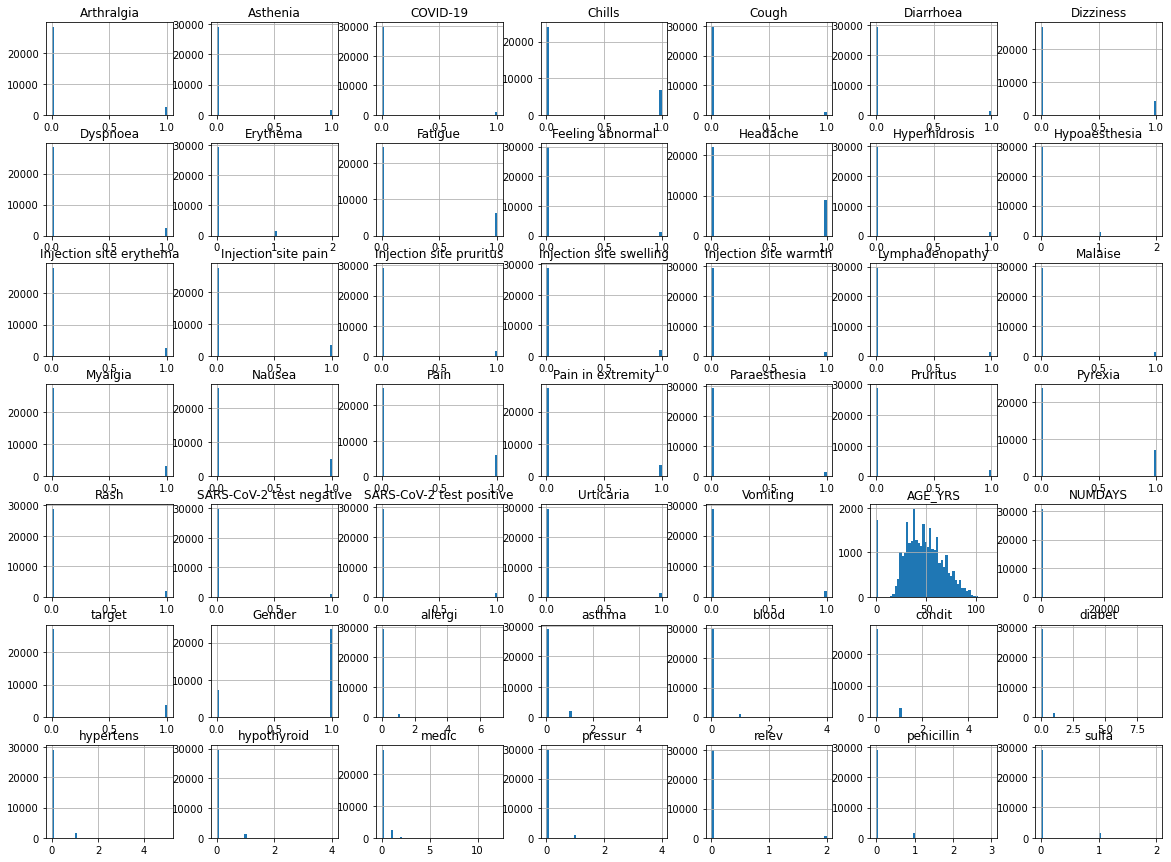

In [64]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

df_merge.hist(bins=50, figsize=(20,15));

In [65]:
# Variable Correlations with target
df_merge.corr()['target'].sort_values(ascending=False)

target                      1.000000
AGE_YRS                     0.289329
Dyspnoea                    0.265949
hypertens                   0.147613
Asthenia                    0.145244
SARS-CoV-2 test negative    0.145202
diabet                      0.141719
COVID-19                    0.106592
SARS-CoV-2 test positive    0.099456
Vomiting                    0.083597
Cough                       0.066058
hypothyroid                 0.054525
Malaise                     0.036038
medic                       0.029035
Diarrhoea                   0.024201
Hypoaesthesia               0.020246
penicillin                  0.017668
pressur                     0.017589
blood                       0.016588
condit                      0.013726
Feeling abnormal            0.007902
NUMDAYS                     0.002247
sulfa                      -0.001370
Hyperhidrosis              -0.003093
asthma                     -0.007155
Paraesthesia               -0.007767
Dizziness                  -0.009795
N

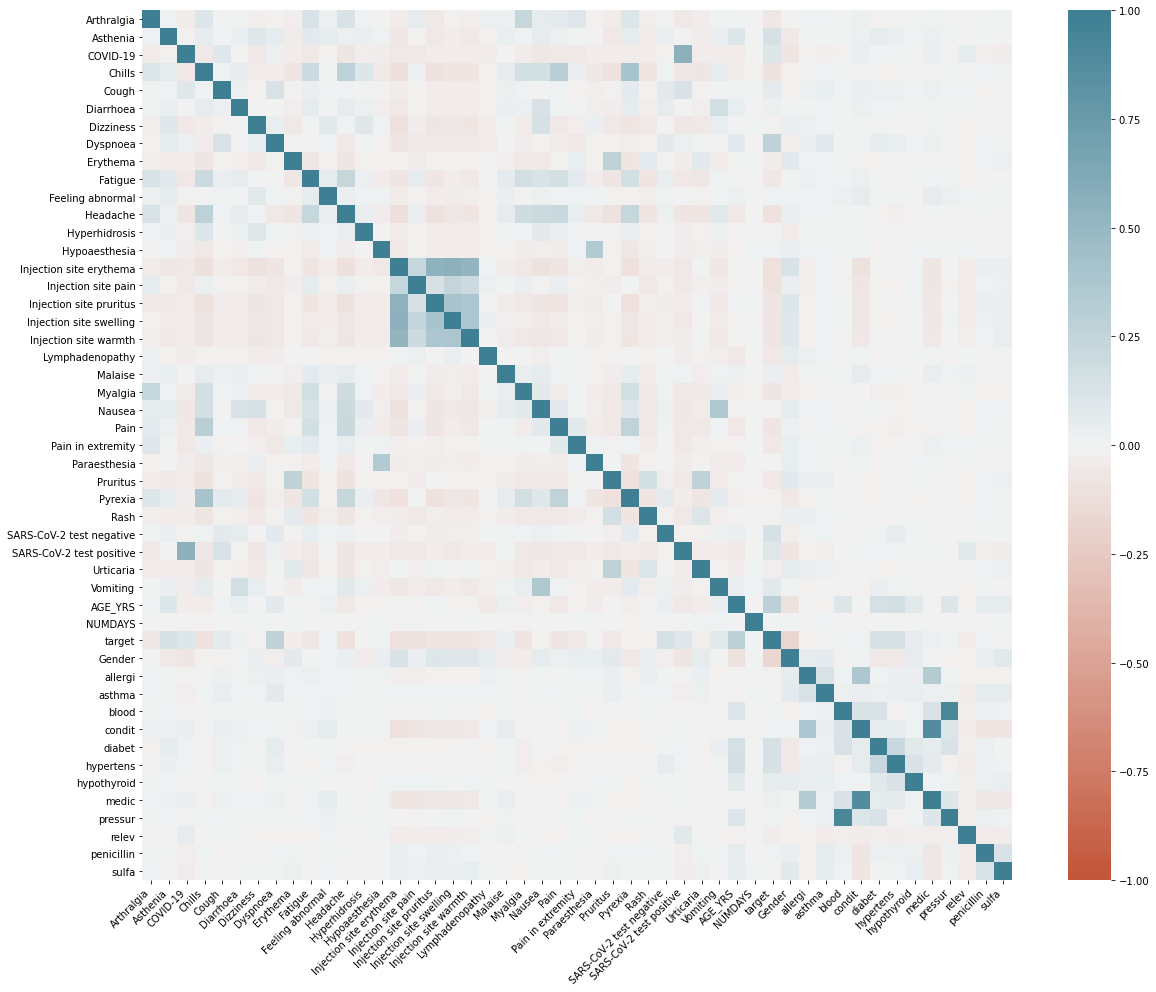

In [70]:
from seaborn import heatmap, diverging_palette

fig, ax = plt.subplots(figsize=(20, 16))

corr = df_merge.corr()
ax = heatmap(corr, vmin=-1, vmax=1, center=0, 
    cmap=diverging_palette(20, 220, n=200), square=True, annot=False)

ax.set_xticklabels( ax.get_xticklabels(),
    rotation=45, horizontalalignment='right');

In [92]:
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from IPython.display import Image


# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df_merge)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);


g.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairgrid1.png') # Show pairplot as image

#See https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

ValueError: Contour levels must be increasing

In [94]:
plt.clf() # Clean parirplot figure from sns 
Image(filename='pairgrid1.png') # Show pairplot as image


<Figure size 432x288 with 0 Axes>

## Classification

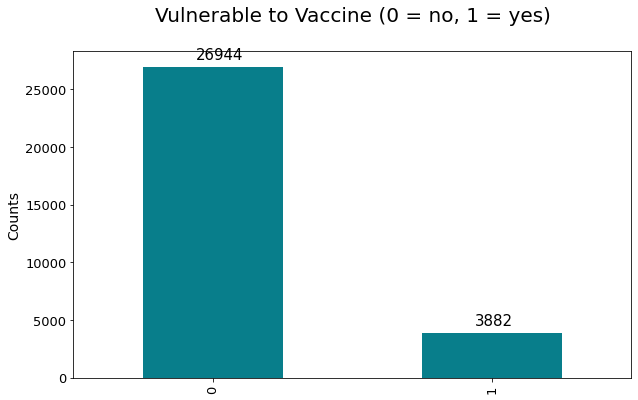

In [71]:
import matplotlib.pyplot as plt

# showing how are dataset is unbalanced
ax = df_merge['target'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Vulnerable to Vaccine (0 = no, 1 = yes)', size=20, pad=30)
ax.set_ylabel('Counts', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

### Classification with Unbalanced Dataset

In [72]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [73]:
allData = df_merge
y = df_merge['target'] # 1D targer vector
X = df_merge.drop(labels='target', axis=1)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_train, y_train)

y_pred = knnclf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Roc-auc:', roc_auc_score(y_test, y_pred))

[[5205  162]
 [ 508  291]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5367
           1       0.64      0.36      0.46       799

    accuracy                           0.89      6166
   macro avg       0.78      0.67      0.70      6166
weighted avg       0.88      0.89      0.88      6166

Roc-auc: 0.6670103979891018


### Classification with Balanced Dataset (SMOTE)

In [75]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_train_SMOTE.shape}''')

print('\nBalance of positive and negative classes (%):')
y_train_SMOTE.value_counts(normalize=True) * 100

Shape of X before SMOTE: (24660, 48)
Shape of X after SMOTE: (43154, 48)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: target, dtype: float64

In [76]:
knnclf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = knnclf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[4292 1075]
 [ 278  521]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      5367
           1       0.33      0.65      0.44       799

    accuracy                           0.78      6166
   macro avg       0.63      0.73      0.65      6166
weighted avg       0.86      0.78      0.81      6166

0.7258834816111905


In [ ]:
# for knn SMOTE Training dataset decreased F1 score, this is expected. However it increased recall for class 1. 

#### KNN Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knnclf2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knnclf2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train_SMOTE, y_train_SMOTE)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
# knn final with hyperparameter tuning 
knnclffinal = KNeighborsClassifier(leaf_size =, n_neighbors = , p =)

knnclffinal.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = knnclffinal.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(random_state=42)

rfclf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = rfclf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[5078  289]
 [ 395  404]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5367
           1       0.58      0.51      0.54       799

    accuracy                           0.89      6166
   macro avg       0.76      0.73      0.74      6166
weighted avg       0.88      0.89      0.89      6166

0.7258922264718358


Feature: 0, Score: 0.00899
Feature: 1, Score: 0.01197
Feature: 2, Score: 0.00347
Feature: 3, Score: 0.03818
Feature: 4, Score: 0.00572
Feature: 5, Score: 0.00522
Feature: 6, Score: 0.01381
Feature: 7, Score: 0.05389
Feature: 8, Score: 0.00792
Feature: 9, Score: 0.02950
Feature: 10, Score: 0.00422
Feature: 11, Score: 0.05984
Feature: 12, Score: 0.00403
Feature: 13, Score: 0.00739
Feature: 14, Score: 0.02073
Feature: 15, Score: 0.02038
Feature: 16, Score: 0.01141
Feature: 17, Score: 0.01008
Feature: 18, Score: 0.00600
Feature: 19, Score: 0.00587
Feature: 20, Score: 0.00569
Feature: 21, Score: 0.01713
Feature: 22, Score: 0.01416
Feature: 23, Score: 0.02424
Feature: 24, Score: 0.01354
Feature: 25, Score: 0.00598
Feature: 26, Score: 0.01264
Feature: 27, Score: 0.02052
Feature: 28, Score: 0.00932
Feature: 29, Score: 0.00985
Feature: 30, Score: 0.00396
Feature: 31, Score: 0.00690
Feature: 32, Score: 0.00988
Feature: 33, Score: 0.21666
Feature: 34, Score: 0.15703
Feature: 35, Score: 0.06665
Fe

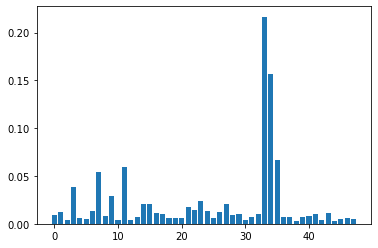

In [78]:
from matplotlib import pyplot

# get feature importance from RF
importance = rfclf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Feature 33 and Feature 34 are most important, these are age and numdays in hospital. However some symptoms
# are still important.
df_merge.columns

### Support Vector Machine 

#### Classification with unbalanced Dataset

In [79]:
# y = df_merge['target'] # 1D targer vector
# X = df_merge.drop(labels='target', axis=1)

# Split data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify=y)

# Scale the train and test set
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Implement LinearSVC with default values

In [80]:
from sklearn.svm import LinearSVC, SVC

# Implement Linear SVC (Support Vector cLassifier) with default paramenters
linear_svc_clf = LinearSVC(loss="hinge", random_state=42)
# train LienarSVC model
linear_svc_clf.fit(X_train, y_train)

# Prediction of training set
y_train_predicted = linear_svc_clf.predict(X_train)
print("Training Accuracy: ", linear_svc_clf.score(X_train, y_train))

# Prediction of test set
y_test_predicted = linear_svc_clf.predict(X_test)
print("Test Accuracy: ", linear_svc_clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


Training Accuracy:  0.9019464720194648
Test Accuracy:  0.8991242296464482

Test Confusion Matrix:
[[5342   47]
 [ 575  202]]

Test Precision = 0.811245
Test Recall = 0.259974
Test F1 Score = 0.393762


#### Hyperparameter tunning for LinearSVC

In [83]:
# Hyperparameter tunning for the LinearSVC
param_grid = {'C': [1, 10, 100], 
              'max_iter':[1000, 2000],
              'tol': [0.001, 0.0001],
              }

clf_svc = LinearSVC(loss="hinge", random_state=42)
clf_svc_cv = GridSearchCV(clf_svc, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
clf_svc_cv.fit(X_train, y_train.ravel())

params_optimal_svc = clf_svc_cv.best_params_
print("Best Score (accuracy): %f" % clf_svc_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_svc)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Score (accuracy): 0.902028
Optimal Hyperparameter Values:  {'C': 1, 'max_iter': 2000, 'tol': 0.001}




#### LinearSVC with optimal values

In [87]:
# Implement Linear SVC (Support Vector cLassifier) with optimal parameters
linear_svc_clf = LinearSVC(C=1, max_iter=2000, tol=0.001, loss="hinge", random_state=42)

# train LienarSVC model
linear_svc_clf.fit(X_train, y_train)

# Prediction of training set
y_train_predicted = linear_svc_clf.predict(X_train)
print("Training Accuracy: ", linear_svc_clf.score(X_train, y_train))

y_test_predicted = svm_clf.predict(X_test)
print("Test Accuracy: ", linear_svc_clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report Train set:")
print(classification_report(y_train, y_train_predicted))

print("\nClassification Report Test set:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy:  0.9021492295214923
Test Accuracy:  0.8992864093415505

Test Confusion Matrix:
[[5340   49]
 [ 572  205]]

Test Precision = 0.807087
Test Recall = 0.263835
Test F1 Score = 0.397672

Classification Report Train set:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     21555
           1       0.81      0.29      0.43      3105

    accuracy                           0.90     24660
   macro avg       0.86      0.64      0.69     24660
weighted avg       0.89      0.90      0.88     24660


Classification Report Test set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      5389
           1       0.81      0.26      0.40       777

    accuracy                           0.90      6166
   macro avg       0.86      0.63      0.67      6166
weighted avg       0.89      0.90      0.88      6166



I think the LinearSVC is fitting the data set. There is barely no difference in the performance in the train set and test set. However the results show that the model does a better job classifying class 0 (patients who didn't or enconuter highly risky reactions from the vaccine) due to the dataset being unbalanced.

Let's see how the dataset performs when we use **polynomial kernels with SVM**:

#### Hyperparameter tunning for polynomial SVM

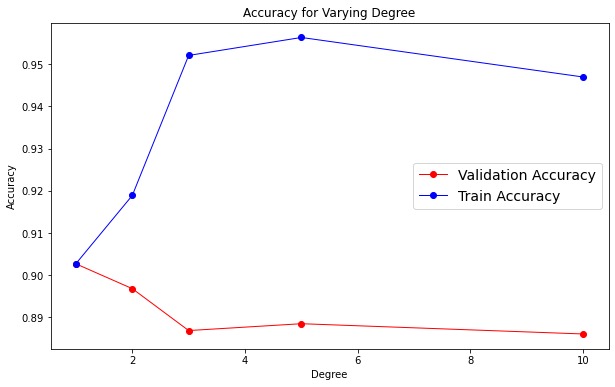

Optimal Degree:  1


Wall time: 6min 31s


In [88]:
%%time

# Split data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify=y)

# Split Training data into Traing and Validation Fold
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Scale the train and test set
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

degreeList = [1, 2, 3, 5, 10]

accuracy_train, accuracy_val = [], []

for degree in degreeList:
    
    model = SVC(C=10, kernel='poly', degree=degree, gamma='auto')
    
    model.fit(X_train_fold, y_train_fold)
       
    # Make prediction 
    y_train_predicted = model.predict(X_train_fold)
    y_val_predicted = model.predict(X_val_fold)
    
    accuracy_train.append(model.score(X_train_fold, y_train_fold))
    accuracy_val.append(model.score(X_val_fold, y_val_fold))
    

plt.figure(figsize=(10, 6))   
plt.plot(degreeList, accuracy_val, "ro-", alpha=1.0, linewidth=1.0, label="Validation Accuracy")
plt.plot(degreeList, accuracy_train, "bo-", alpha=1.0, linewidth=1.0, label="Train Accuracy")  

plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy for Varying Degree")
plt.show()


# Find the value of degree that gives max validation accuracy
j = 0
max_val_accuracy = accuracy_val[j]
optimal_degree = 1

for i in degreeList:
    if(accuracy_val[j] > max_val_accuracy):
        max_val_accuracy = accuracy_val[j]
        optimal_degree = i
    j +=1
    
print("Optimal Degree: ", optimal_degree)
print("\n")

As we suspeted the data responds to degree 1, linear data.

#### Hyperparameter tuning SVM Gaussian Kernel (RBF)

In [90]:
%%time

param_grid = {'gamma': [0.000001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'C': [10, 100, 1000, 10000]}

clf = SVC(kernel="rbf")
clf_cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
clf_cv.fit(X_train, y_train)

params_optimal = clf_cv.best_params_

print("Best Score (accuracy): %f" % clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

Best Score (accuracy): 0.905637
Optimal Hyperparameter Values:  {'C': 10000, 'gamma': 0.0001}


Wall time: 3h 51min 46s


#### SVM Gaussian Kernel (RBF) optimal parameters

In [95]:
gamma_opt = params_optimal['gamma']
C_opt = params_optimal['C']

svm_rbf_clf = SVC(kernel="rbf", gamma=gamma_opt, C=C_opt)
svm_rbf_clf.fit(X_train, y_train)

y_train_predicted = svm_rbf_clf.predict(X_train)
print("Training Accuracy: ", svm_rbf_clf.score(X_train, y_train))

y_test_predicted = svm_rbf_clf.predict(X_test)
print("Test Accuracy: ", svm_rbf_clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_predicted))

Training Accuracy:  0.9113949716139497
Test Accuracy:  0.903503081414207

Test Confusion Matrix:
[[5321   68]
 [ 527  250]]

Test Precision = 0.786164
Test Recall = 0.321750
Test F1 Score = 0.456621

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5389
           1       0.79      0.32      0.46       777

    accuracy                           0.90      6166
   macro avg       0.85      0.65      0.70      6166
weighted avg       0.89      0.90      0.89      6166



#### LinearSVC with Balanced Dataset (SMOTE)

In [99]:
#!pip install imbalanced-learn
#from imblearn.over_sampling import SMOTE
#smt = SMOTE(random_state=42)
#X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_train_SMOTE.shape}''')

print('\nBalance of positive and negative classes (%):')
print(y_train_SMOTE.value_counts(normalize=True) * 100)

# Implement Linear SVC (Support Vector cLassifier) with optimal parameters
svm_clf = LinearSVC(C=1, loss="hinge", max_iter=2000, tol=0.001, random_state=42)

# train LienarSVC model
svm_clf.fit(X_train_SMOTE, y_train_SMOTE)

# Prediction of training set
y_train_predicted = svm_clf.predict(X_train_SMOTE)
print("\nTraining Accuracy: ", svm_clf.score(X_train_SMOTE, y_train_SMOTE))

y_test_predicted = svm_clf.predict(X_test)
print("Test Accuracy: ", svm_clf.score(X_test, y_test))

print("\nClassification Report Train set:")
print(classification_report(y_train_SMOTE, y_train_predicted))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report Test set:")
print(classification_report(y_test, y_test_predicted))


Shape of X before SMOTE: (24660, 48)
Shape of X after SMOTE: (43110, 48)

Balance of positive and negative classes (%):
1    50.0
0    50.0
Name: target, dtype: float64

Training Accuracy:  0.7952215263279981
Test Accuracy:  0.8086279597794356

Classification Report Train set:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     21555
           1       0.81      0.77      0.79     21555

    accuracy                           0.80     43110
   macro avg       0.80      0.80      0.80     43110
weighted avg       0.80      0.80      0.80     43110


Test Confusion Matrix:
[[4415  974]
 [ 206  571]]

Test Precision = 0.369579
Test Recall = 0.734878
Test F1 Score = 0.491817

Classification Report Test set:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      5389
           1       0.37      0.73      0.49       777

    accuracy                           0.81      6166
   macro avg      

### Multilayer Perceptron

In [103]:
%%time

from sklearn.neural_network import MLPClassifier

param_grid = {'hidden_layer_sizes': [(3,), (5,), (10,),
               'activation':['logistic', 'relu', 'tanh'],
               'alpha': (0.1, 0.01),
               'tol': (0.001, 0.0001),
               'learning_rate_init':[0.01, 0.001],
               'learning_rate': ['adaptive', 'constant']}

clf_mlp = MLPClassifier(solver='adam', early_stopping=True)

clf_mlp_cv = GridSearchCV(clf_mlp, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
clf_mlp_cv.fit(X_train, y_train)


params_optimal_mlp = clf_mlp_cv.best_params_

print("Best Score (accuracy): %f" % clf_mlp_cv.best_score_)

print("Optimal Hyperparameter Values: ", params_optimal_mlp)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score (accuracy): 0.907664
Optimal Hyperparameter Values:  {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'tol': 0.001}
Wall time: 3min 11s


In [122]:
%%time
mlp_clf = MLPClassifier(random_state=42, hidden_layer_sizes=(3,), alpha=0.1, solver='adam',
                      learning_rate='constant', activation='logistic', verbose=True,
                      learning_rate_init=0.01, tol=0.001)


mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 0.39284440
Iteration 2, loss = 0.28257266
Iteration 3, loss = 0.27813876
Iteration 4, loss = 0.27530216
Iteration 5, loss = 0.27261526
Iteration 6, loss = 0.27033827
Iteration 7, loss = 0.26844373
Iteration 8, loss = 0.26668415
Iteration 9, loss = 0.26533409
Iteration 10, loss = 0.26457058
Iteration 11, loss = 0.26366193
Iteration 12, loss = 0.26263423
Iteration 13, loss = 0.26249394
Iteration 14, loss = 0.26168391
Iteration 15, loss = 0.26155882
Iteration 16, loss = 0.26106333
Iteration 17, loss = 0.26128427
Iteration 18, loss = 0.26057281
Iteration 19, loss = 0.26071013
Iteration 20, loss = 0.26055488
Iteration 21, loss = 0.26041425
Iteration 22, loss = 0.25991854
Iteration 23, loss = 0.25999211
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
Wall time: 2.73 s


MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(3,),
              learning_rate_init=0.01, random_state=42, tol=0.001,
              verbose=True)

In [124]:
print("No. of Iterations:", mlp_clf.n_iter_ )

y_train_predicted = mlp_clf.predict(X_train)
print("\nTraining Accuracy: ", mlp_clf.score(X_train, y_train))

y_test_predicted = mlp_clf.predict(X_test)
print("Test Accuracy: ", mlp_clf.score(X_test, y_test))

print("\nClassification Report Train set:")
print(classification_report(y_train, y_train_predicted))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report Test set:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: 23

Training Accuracy:  0.908110300081103
Test Accuracy:  0.903503081414207

Classification Report Train set:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     21555
           1       0.74      0.41      0.53      3105

    accuracy                           0.91     24660
   macro avg       0.83      0.70      0.74     24660
weighted avg       0.90      0.91      0.90     24660


Test Confusion Matrix:
[[5276  113]
 [ 482  295]]

Test Precision = 0.723039
Test Recall = 0.379665
Test F1 Score = 0.497890

Classification Report Test set:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5389
           1       0.72      0.38      0.50       777

    accuracy                           0.90      6166
   macro avg       0.82      0.68      0.72      6166
weighted avg       0.89      0.90      0.89      6166

